**Importing Librairies**

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

**Importing Data**

In [3]:
df = pd.read_csv("data.csv")
df.head()

,CLE,ANNEE,NOFEU,SECTION,CAUSE,DATE_DEBUT,DATE_RAPPO,DATE_ETEIN,SUP_HA,LATITUDE,LONGITUDE,geometry
0,1.972101e+10,1972,1001,Intensive,Humaine,1972-05-17,1972-05-17,1972-05-17,0.0,49.20444,-65.74036,POINT (200020.17149999738 581894.7842000015)
1,1.972101e+10,1972,1002,Intensive,Humaine,1972-05-22,1972-05-23,1972-05-24,0.2,48.75719,-67.45225,POINT (76682.27359999716 529102.0194999985)
2,1.972101e+10,1972,1003,Intensive,Humaine,1972-05-22,1972-05-23,1972-05-27,8.5,48.60762,-67.56837,POINT (68399.80579999834 512427.7065999992)
3,1.972101e+10,1972,1004,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-24,0.1,48.84772,-67.20080,POINT (94901.53959999979 539422.9448000006)
4,1.972101e+10,1972,1005,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-23,0.0,49.10402,-64.73214,POINT (273622.7747000009 574131.313099999)


In [4]:
#The dimensions of the dataFrame 
df.shape

(42791, 12)

**Data Cleaning**

In [5]:
#Any missing values?
df.isnull().any()

CLE           False
ANNEE         False
NOFEU         False
SECTION       False
CAUSE         False
DATE_DEBUT     True
DATE_RAPPO    False
DATE_ETEIN     True
SUP_HA        False
LATITUDE      False
LONGITUDE     False
geometry      False
dtype: bool

In [6]:
# Total number of missing values for each feature
print(df.isnull().sum())

CLE           0
ANNEE         0
NOFEU         0
SECTION       0
CAUSE         0
DATE_DEBUT    1
DATE_RAPPO    0
DATE_ETEIN    8
SUP_HA        0
LATITUDE      0
LONGITUDE     0
geometry      0
dtype: int64


In [7]:
df = df[df['SUP_HA'] != 0]
df.to_csv("newdata.csv", index=False)

In [8]:
df.head()

,CLE,ANNEE,NOFEU,SECTION,CAUSE,DATE_DEBUT,DATE_RAPPO,DATE_ETEIN,SUP_HA,LATITUDE,LONGITUDE,geometry
1,1.972101e+10,1972,1002,Intensive,Humaine,1972-05-22,1972-05-23,1972-05-24,0.2,48.75719,-67.45225,POINT (76682.27359999716 529102.0194999985)
2,1.972101e+10,1972,1003,Intensive,Humaine,1972-05-22,1972-05-23,1972-05-27,8.5,48.60762,-67.56837,POINT (68399.80579999834 512427.7065999992)
3,1.972101e+10,1972,1004,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-24,0.1,48.84772,-67.20080,POINT (94901.53959999979 539422.9448000006)
6,1.972101e+10,1972,1007,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-24,0.6,48.83603,-64.66530,POINT (280060.66170000285 544773.1446000002)
7,1.972101e+10,1972,1008,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-23,0.9,48.36661,-64.72834,POINT (278198.93400000036 492628.442400001)


In [9]:
# drop rows with missing values
df.dropna(subset=['DATE_ETEIN'], inplace=True)
df.isnull().any()

CLE           False
ANNEE         False
NOFEU         False
SECTION       False
CAUSE         False
DATE_DEBUT    False
DATE_RAPPO    False
DATE_ETEIN    False
SUP_HA        False
LATITUDE      False
LONGITUDE     False
geometry      False
dtype: bool

**Data Manipulation**

In [10]:
# dates: 
df['DATE'] = pd.to_datetime(df.DATE_DEBUT)
df.DATE = df.DATE.dt.strftime('%m/%d/%Y')
df['DATE'] = pd.to_datetime(df.DATE)
df['MOIS'] = pd.DatetimeIndex(df['DATE']).month
df.head()

,CLE,ANNEE,NOFEU,SECTION,CAUSE,DATE_DEBUT,DATE_RAPPO,DATE_ETEIN,SUP_HA,LATITUDE,LONGITUDE,geometry,DATE,MOIS
1,1.972101e+10,1972,1002,Intensive,Humaine,1972-05-22,1972-05-23,1972-05-24,0.2,48.75719,-67.45225,POINT (76682.27359999716 529102.0194999985),1972-05-22,5
2,1.972101e+10,1972,1003,Intensive,Humaine,1972-05-22,1972-05-23,1972-05-27,8.5,48.60762,-67.56837,POINT (68399.80579999834 512427.7065999992),1972-05-22,5
3,1.972101e+10,1972,1004,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-24,0.1,48.84772,-67.20080,POINT (94901.53959999979 539422.9448000006),1972-05-23,5
6,1.972101e+10,1972,1007,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-24,0.6,48.83603,-64.66530,POINT (280060.66170000285 544773.1446000002),1972-05-23,5
7,1.972101e+10,1972,1008,Intensive,Humaine,1972-05-23,1972-05-23,1972-05-23,0.9,48.36661,-64.72834,POINT (278198.93400000036 492628.442400001),1972-05-23,5


In [11]:
#Shuffle the rows of the dataframe
df = df.sample(frac = 1).reset_index(drop = True)

In [12]:
df.head()

,CLE,ANNEE,NOFEU,SECTION,CAUSE,DATE_DEBUT,DATE_RAPPO,DATE_ETEIN,SUP_HA,LATITUDE,LONGITUDE,geometry,DATE,MOIS
0,2.020108e+10,2020,304,Intensive,Humaine,2020-05-23,2020-05-23,2020-05-23,0.4,46.13010,-73.73440,POINT (-404055.71720000356 251999.56689999998),2020-05-23,5
1,2.017108e+10,2017,298,Intensive,Humaine,2017-10-21,2017-10-21,2017-10-21,0.3,45.99810,-74.64420,POINT (-475383.53880000114 242965.95850000158),2017-10-21,10
2,2.010108e+10,2010,101,Intensive,Humaine,2010-04-28,2010-04-28,2010-04-29,4.7,48.79060,-78.12030,POINT (-701496.8081 579463.5399000011),2010-04-28,4
3,1.992106e+10,1992,6099,Intensive,Foudre,1992-06-12,1992-06-14,1992-06-17,0.5,46.48591,-78.29937,POINT (-749351.6278000027 328130.0023000017),1992-06-12,6
4,2.011108e+10,2011,303,Intensive,Humaine,2011-10-08,2011-10-08,2011-10-10,0.4,48.01000,-78.33610,POINT (-728979.2531000003 495972.26590000093),2011-10-08,10


**Exploratory Data Analysis**

array([[<AxesSubplot: title={'center': 'CLE'}>,
        <AxesSubplot: title={'center': 'ANNEE'}>,
        <AxesSubplot: title={'center': 'NOFEU'}>],
       [<AxesSubplot: title={'center': 'SUP_HA'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>,
        <AxesSubplot: title={'center': 'LONGITUDE'}>],
       [<AxesSubplot: title={'center': 'DATE'}>,
        <AxesSubplot: title={'center': 'MOIS'}>, <AxesSubplot: >]],
      dtype=object)

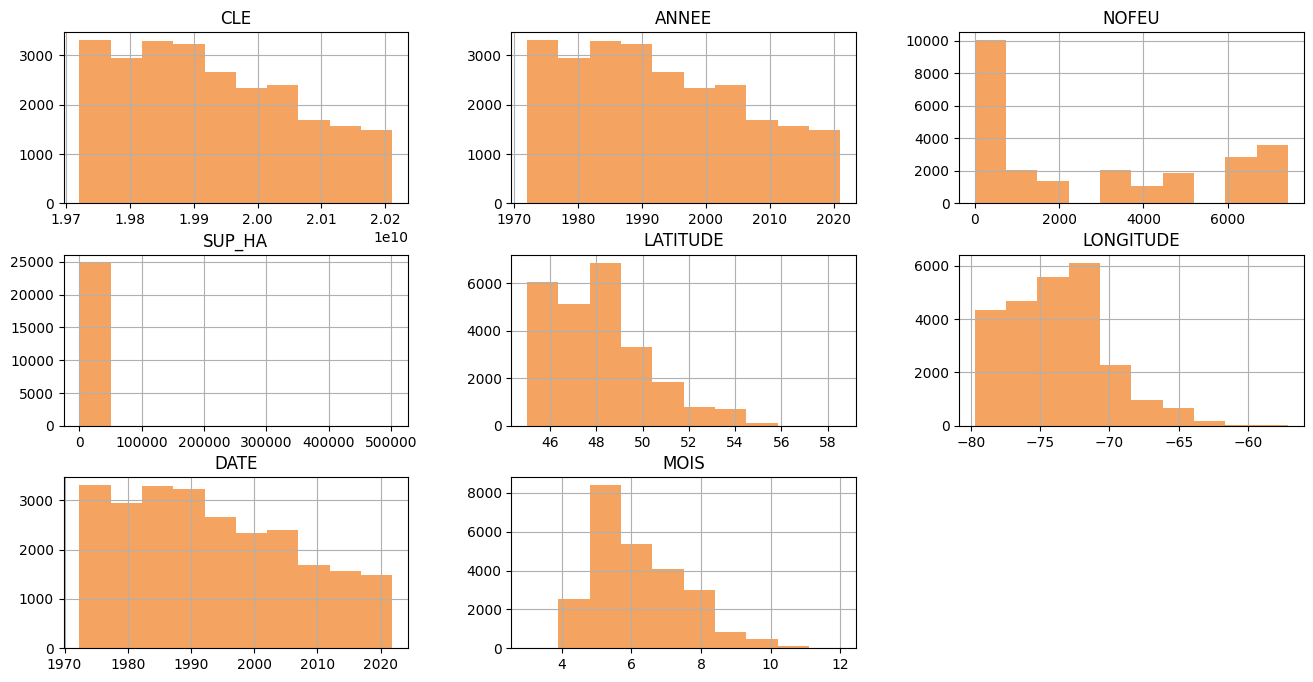

In [13]:
#Create histograms for all numerical columns in the dataframe
df.hist(figsize=(16,8), color='sandybrown')

> Map , Color by Date

In [14]:
df['DATE_DEBUT'] = pd.to_datetime(df['DATE_DEBUT'])
print('Earliest Start Date: ', df['DATE_DEBUT'].min())
print('Latest Start Date: ', df['DATE_DEBUT'].max())

Earliest Start Date:  1972-04-29 00:00:00
Latest Start Date:  2021-11-09 00:00:00


In [15]:
df.MOIS.value_counts()
# Most fires happenned in May/June

5     8391
6     5358
7     4067
8     2996
4     2557
9      855
10     486
11     130
3       34
12       1
Name: MOIS, dtype: int64

In [16]:
df_may = df[df['MOIS'] == 5]
df_june = df[df['MOIS'] == 6]
df_july = df[df['MOIS'] ==  7]
df_may = df_may[:250]
df_june = df_june[:250]
df_july = df_july[:250]

In [17]:
wa_coord = (47.4, -120.7401)
# Creating an empty map
map = folium.Map(location = wa_coord, zoom_start = 7.3, tiles='Cartodb Positron')

# Adding markers:
# MAI - Yellow
for i in range(0,len(df_may)):
    folium.CircleMarker([df_may.iloc[i]['LATITUDE'], 
                         df_may.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'yellow',
                         fill_color='white',
                         popup=df_may.iloc[i]['MOIS']).add_to(map)
    
# JUNE - BLUE    
for i in range(0,len(df_june)):
    folium.CircleMarker([df_june.iloc[i]['LATITUDE'], 
                         df_june.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'blue',
                         fill_color='white',
                         popup=df_june.iloc[i]['MOIS']).add_to(map)
# JULY - Red    
for i in range(0,len(df_july)):
    folium.CircleMarker([df_july.iloc[i]['LATITUDE'], 
                         df_july.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'red',
                         fill_color='white',
                         popup=df_july.iloc[i]['MOIS']).add_to(map)
display(map)

> Map, Color by Cause

In [18]:
print('Cause of fires:\n',df.CAUSE.value_counts())

Cause of fires:
 Humaine    17315
Foudre      7560
Name: CAUSE, dtype: int64


In [19]:
df_humaine = df[df['CAUSE'] == 'Humaine']
df_foudre = df[df['CAUSE'] == 'Foudre']

df_humaine = df_humaine[:250]
df_foudre = df_foudre[:250]
df100 = df[:250]

In [20]:
wa_coord = (47.4, -120.7401)
# Creating an empty map
map = folium.Map(location = wa_coord, zoom_start = 7.3, tiles='Cartodb Positron')

# Humaine - Yellow
for i in range(0,len(df_humaine)):
    folium.CircleMarker([df_humaine.iloc[i]['LATITUDE'], 
                         df_humaine.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'blue',
                         fill_color='white',
                         popup=df_humaine.iloc[i]['CAUSE']).add_to(map)
    
# Foudre - Blue   
for i in range(0,len(df_foudre)):
    folium.CircleMarker([df_foudre.iloc[i]['LATITUDE'], 
                         df_foudre.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'yellow',
                         fill_color='white',
                         popup=df_foudre.iloc[i]['CAUSE']).add_to(map)


display(map)

> Map, Color by size

In [21]:
df_small = df[df['SUP_HA'] < 4]
df_med = df[df['SUP_HA'] >= 4]
df_med = df_med[df_med['SUP_HA'] < 40]
df_large = df[df['SUP_HA'] >= 40]

df_small = df_small[:300]
df_med = df_med[:300]
df_large = df_large[:300]

In [22]:
wa_coord = (47.4, -120.7401)
# Creating an empty map
map = folium.Map(location = wa_coord, zoom_start = 7.3, tiles='Cartodb Positron')

# Small - Yellow
for i in range(0,len(df_small)):
    folium.CircleMarker([df_small.iloc[i]['LATITUDE'], 
                         df_small.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'yellow',
                         fill_color='white',
                         popup=df_small.iloc[i]['SUP_HA']).add_to(map)
    
# Med - Orange    
for i in range(0,len(df_med)):
    folium.CircleMarker([df_med.iloc[i]['LATITUDE'], 
                         df_med.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'orange',
                         fill_color='white',
                         popup=df_med.iloc[i]['SUP_HA']).add_to(map)
# Large - Red    
for i in range(0,len(df_large)):
    folium.CircleMarker([df_large.iloc[i]['LATITUDE'], 
                         df_large.iloc[i]['LONGITUDE']],
                         radius = 3,
                         color= 'red',
                         fill_color='white',
                         popup=df_large.iloc[i]['SUP_HA']).add_to(map)
display(map)

Yellow: Small fire, Orange: Medium fire, Red: Large fire


Most of the large fires are clustered around Quebec

**Data Visualization**

> Number of fires for each cause

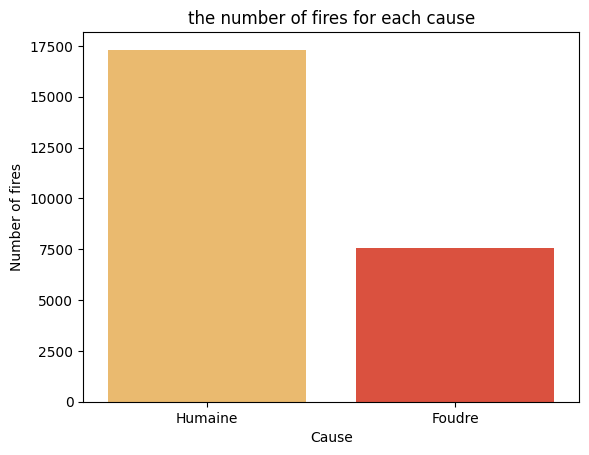

In [30]:
sns.countplot(x='CAUSE', data=df, palette = "YlOrRd",)
plt.title("the number of fires for each cause")
plt.xlabel("Cause")
plt.ylabel("Number of fires")
plt.show()
#Humans are the most common cause of forest fires.

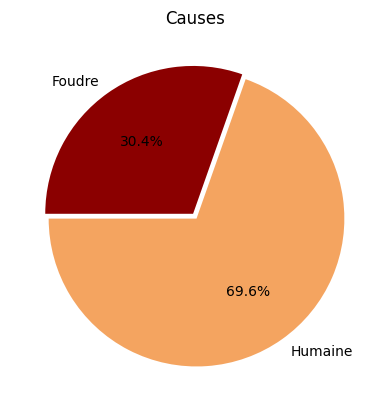

In [22]:

plt.title("Causes")
plt.pie(df.CAUSE.value_counts(),explode=(0.02,0.02),labels=df.CAUSE.value_counts().index
        ,colors=['sandybrown','darkred'],autopct='%1.1f%%',startangle=180)
plt.show()

#Exactly, 69.6% of fire causes are human 

> Number of fires per year

In [23]:
df.ANNEE.value_counts()

1975    1064
1983    1019
2005     834
1996     800
1977     800
1988     792
1972     788
1995     745
1982     720
1989     689
1991     683
1981     659
1976     649
2007     613
1986     580
1987     569
1999     567
1980     564
1978     564
1985     523
2002     516
1992     507
2001     505
1997     495
1990     494
1974     491
1998     475
2020     464
2003     457
2012     453
2010     451
2006     438
1984     437
2016     371
2018     368
1979     355
2021     334
2013     331
1994     322
1973     307
2009     307
2000     292
1993     280
2015     251
2011     195
2019     175
2004     161
2014     159
2017     142
2008     120
Name: ANNEE, dtype: int64

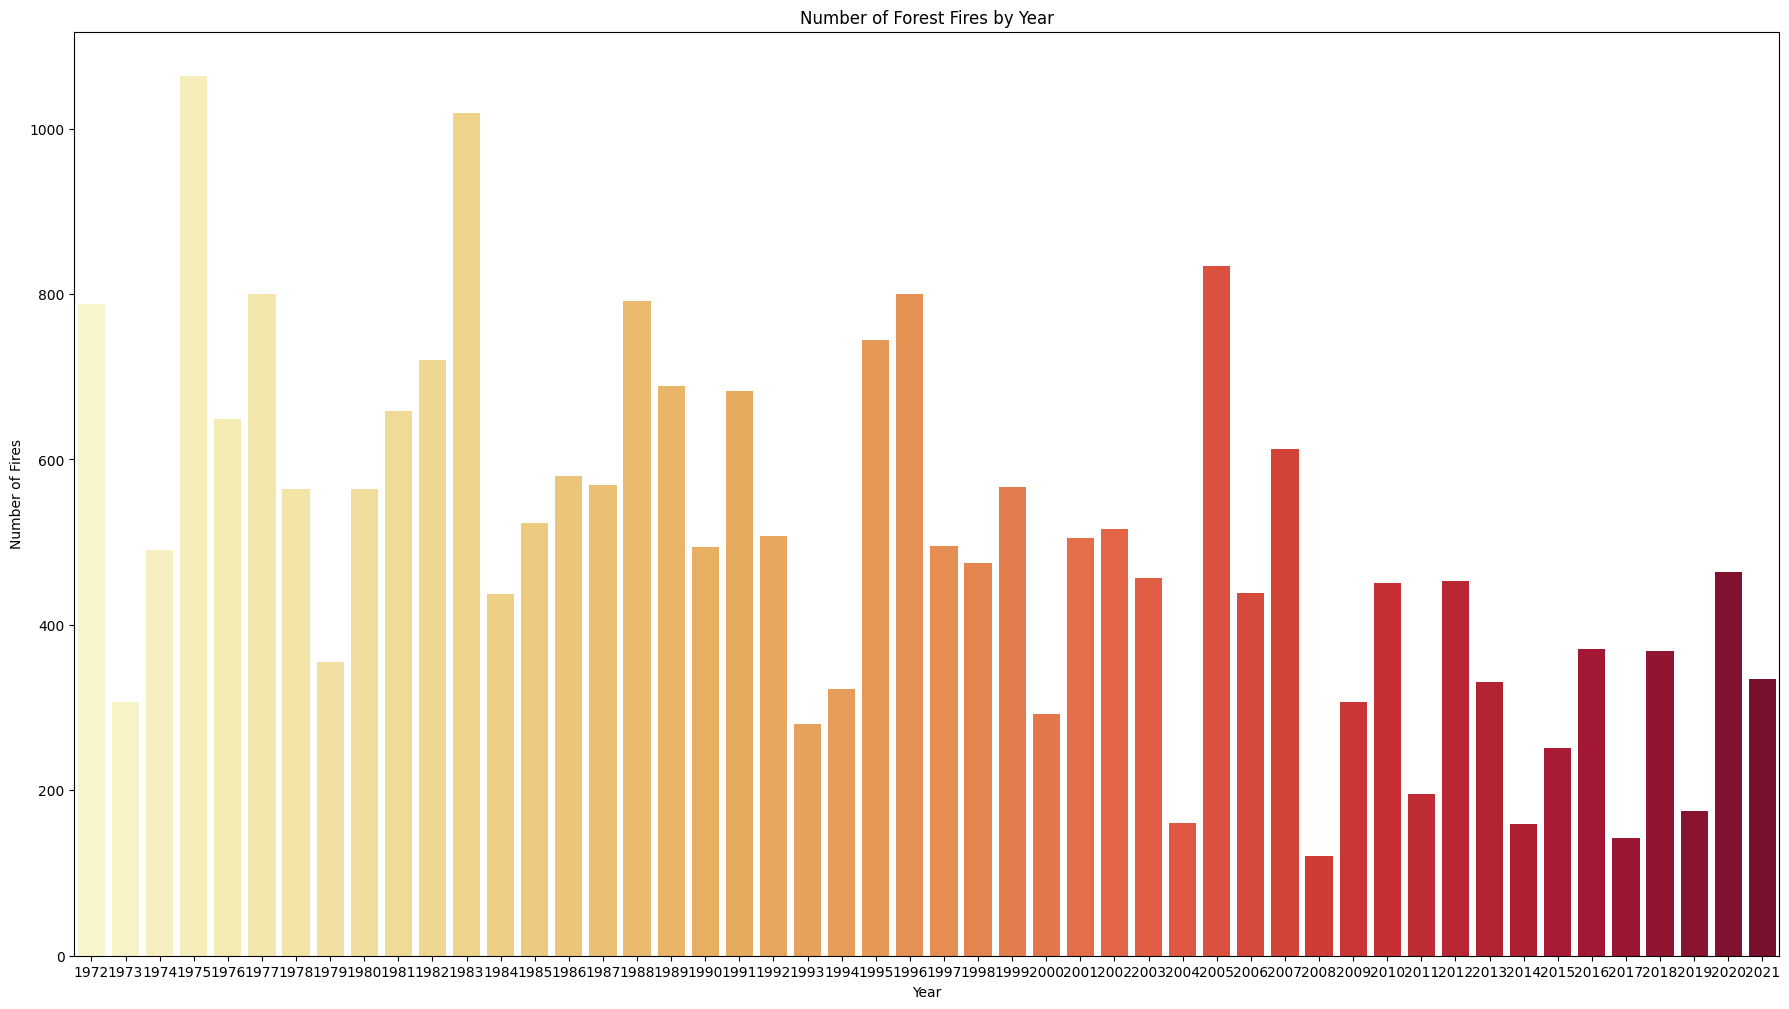

In [24]:
plt.figure(figsize=(22,12))
yearly_count = df['ANNEE'].value_counts().sort_index()
sns.barplot(x=yearly_count.index, y=yearly_count.values, palette="YlOrRd")
plt.title("Number of Forest Fires by Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.show()

> Number of fires per year / causes

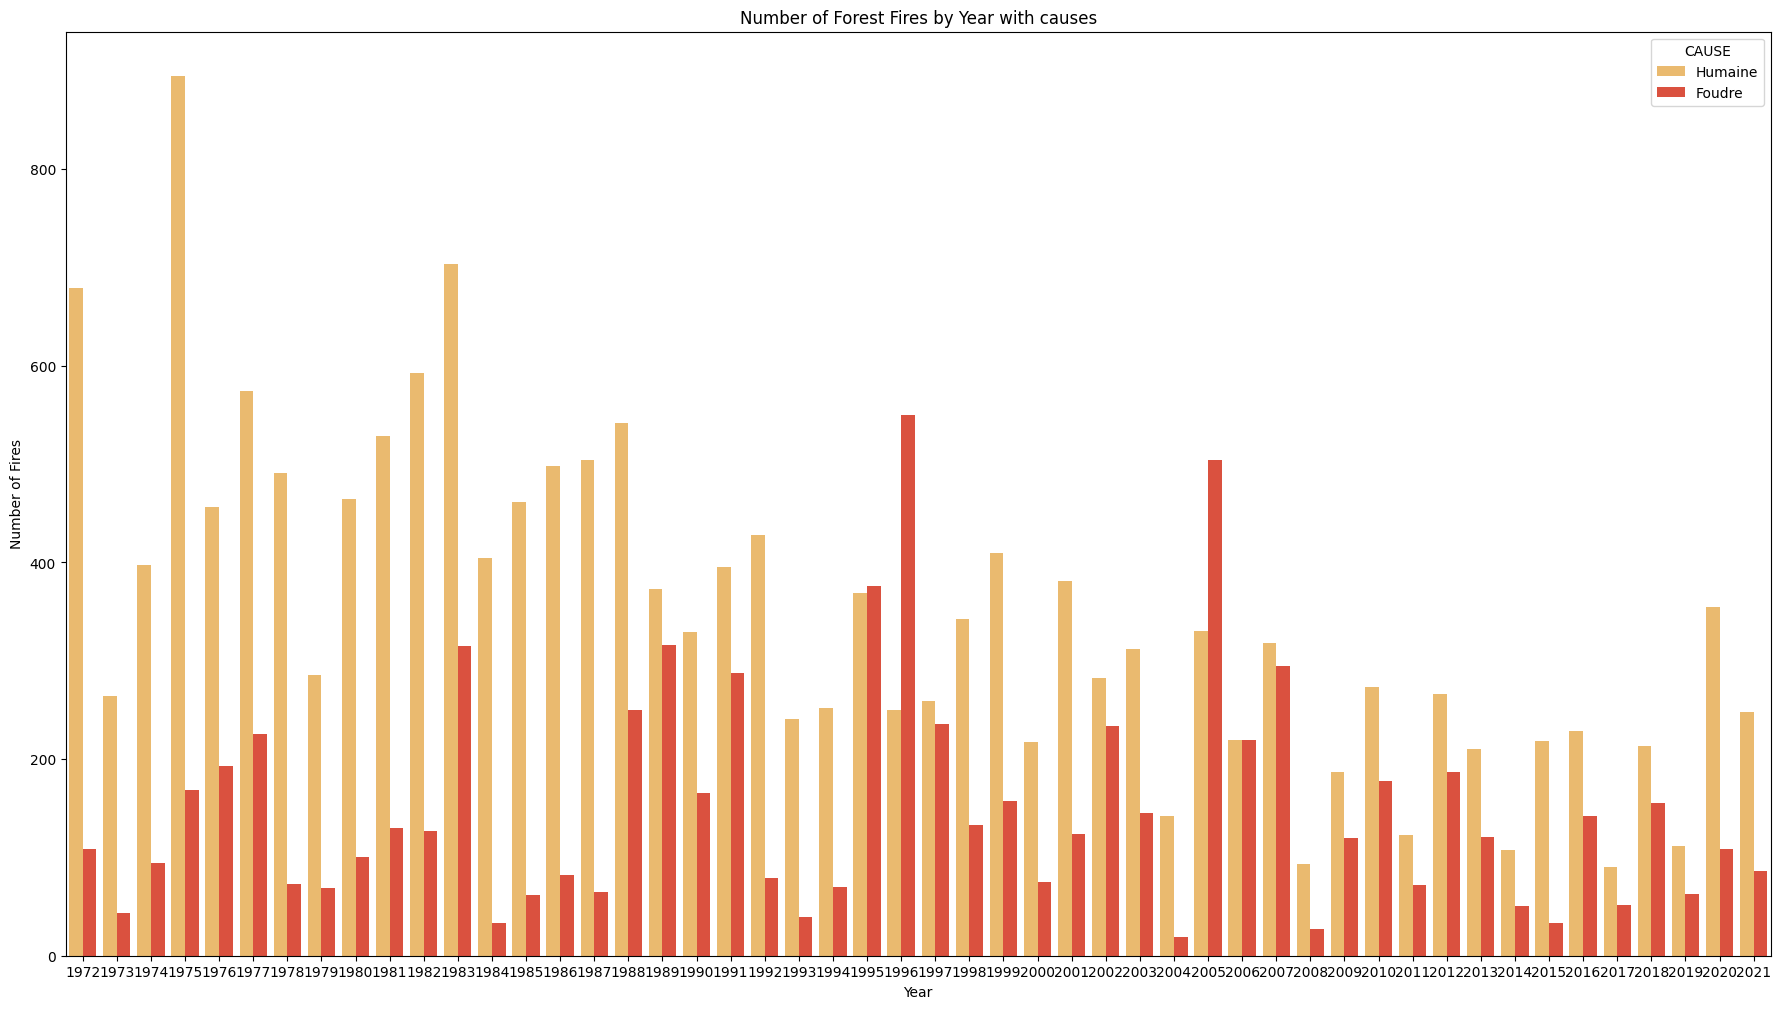

In [25]:
plt.figure(figsize=(22,12)) 
sns.countplot(data=df,x='ANNEE',hue='CAUSE',palette = "YlOrRd")
plt.title("Number of Forest Fires by Year with causes")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.show()

Few are the fires that are not caused by humans. 

> 10 years with the highest number of fires

C:\Users\dell\AppData\Local\Temp\ipykernel_11564\2856624492.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df["ANNEE"].value_counts()[:10].plot(kind="barh",color="sandybrown")


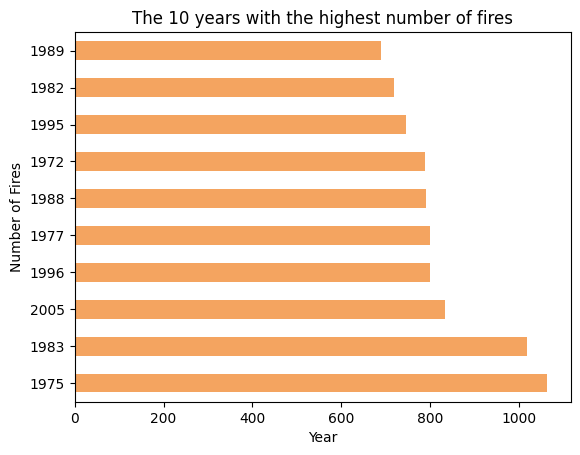

In [26]:
df["ANNEE"].value_counts()[:10].plot(kind="barh",color="sandybrown")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("The 10 years with the highest number of fires")
plt.show()

1957 is the most critical year, which saw the greatest number of fires.

> Burned area over time

<AxesSubplot: xlabel='ANNEE', ylabel='SUP_HA'>

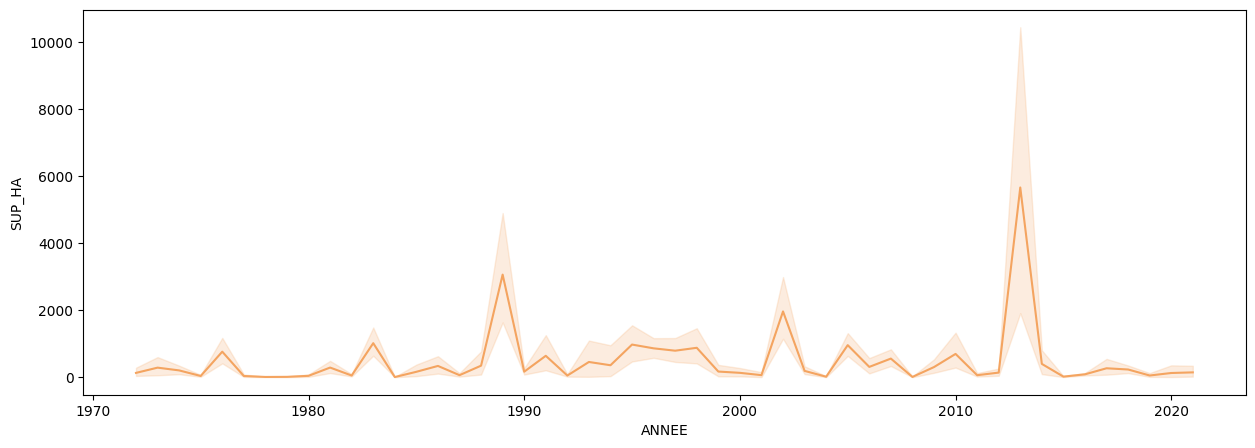

In [27]:
plt.figure(figsize = (15,5))
sns.lineplot(x="ANNEE", y="SUP_HA", data=df, color='sandybrown')